# Chicago Segmentation Project

I will be researching different parts of the city of Chicago with location data via Foursquare API.

# Methodology

In this project I conducted a segmentation of Chicago's 77 neighborhoods. I created KMeans Clusters in order to do this. KMeans Clustering works by creating centroid points in groups of data. These centroid points are used to bin data into clusters. The process itself works by determining which data points are closest to which centroid point. From there the data points are then placed into the appropriate cluster. While there are many applications to this technique, such as clustering customers of a certain brand so that a company can market to them accordingly, in this example I chose to use KMeans Clustering so that I could geographically visualize the differences between neighborhoods.

In order to properly engage the KMeans Clustering Methods I assembled data from a variety of sources. These included: Chicago Neighborhood Location Data, Chicago Neighborhood Demographic Data, Chicago Census Data, and Foursquare API Venue Data.

# Description of the Problem

The city of Chicago is one of the most segregated cities in the United States. Neighborhoods have strong ethnic and economic divisions. This is problematic because residents of predominately Black and Hispanic/Latino neighborhoods are far more likely to be impoverished and have less prevalence of venues that are emblematic of healthy communities. While this project does not address what those venues are, I believe that further analysis could create correlations between the presence of certain venues and the economic wellbeing of a given neighborhood. The most stark divisions are between neighborhoods in the North side of the city and those in the South side. If these neighborhoods could be segmented by their demographics, economic well-being, and presence of venues, then it is likely that both government and non-government organizations could identify nuanced solutions to addressing the needs of neighborhoods that critically require assistance. By analyzing a neighborhood map of Chicago, I will conduct this segmentation of Chicago.

# Data that will be used

I'm going to read in the economic well-being of neighborhoods throughout the city. This data can be found in a dataset from this link:

Link: https://data.cityofchicago.org/Health-Human-Services/Per-Capita-Income/r6ad-wvtk

Description of the data: This data was collected via census between 2008-2012. There are 6 categories that I will be using from this dataset. I decided not to use Percent of Housing Crowded, which is defined as percent of households that have more than 1 person per room, since I wanted to focus more on universal measures of community health.

   1. Percent households below poverty (converted to Poverty Rate)
   2. Percent aged 16+ unemployed (converted to Unofficial Unemployment Rate)
   3. Percent aged 25+ without high school diploma (converted to Non-GED)
   4. Percent aged under 18 or over 65 (converted to Percent Children or Retirement Age)
   5. Per Capita Income (left as is)
   6. Hardship Index (left as is)
    
<b>Note:</b> I want to describe two of these variables since they are not intuitive. 
    
   Per Capita Income is defined as the aggregate of tract level income divided by the total population. Thus, it can be pulled down if there are large families with children.
    
   Hardship Index is the score that incorporates each of the six original socioeconomic indicators. 
    

I'm going to read in the demographic makeup of the neighborhoods in Chicago. This data was collected through the 2010 Census so, while it may not be completely accurate today, it should still be very relevant to the task at hand. 

<b> Note: </b> I decided not to incorporate the use of Total Population of each neighborhood in this project. The reason being is that the use of total population does not fit into the scope of this specific neighborhood segmentation activity. Total Population will result in neighborhoods being placed into bins with neighborhoods that are very different in all aspects other than total population. I do not believe that this will result in an accurate assessment of said neighborhoods. 

Linked: https://datahub.cmap.illinois.gov/dataset/2010-census-data-summarized-to-chicago-community-areas

Description of the Data: The data here gives the percent makeup of the demographics of each neighborhood.
    
    

I'm going to first make a dataframe of the neighborhoods in Chicago. I will do this by reading in a csv of Chicago neighborhoods. I had to this indirectly by running this individuals code that gave a .txt file with locations throughout the neighborhoods. I then averaged the longitudes and latitudes of the neighborhood locations to give a central point in each neighborhood. The link can be found below:

Link: https://github.com/jkgiesler/parse-chicago-neighborhoods

Description of the Data: The data here gave a list of the neighborhoods in Chicago with several longitude and latitude points. As I said, I averaged out those points to give a central location within the neighborhood.
    
Lastly, I will use the Foursquare API to determine the venues that are most present in each of these neighborhoods.

# Libraries and Imports

In [1]:
import pandas as pd
import numpy as np
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage

from sklearn.cluster import KMeans

/Users/naasirhaleem/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Reading in Socioeconomic Factors in Neighborhoods

In [2]:
df = pd.read_csv('/Users/naasirhaleem/Desktop/Jupyter_Notebooks/IBM Notebooks/IBM_Capstone/Per_Capita_Income .csv')

In [3]:
df = df.rename(columns = {'COMMUNITY AREA NAME': 'Neighborhood'})

In [4]:
df.head()

Community Area Number    Neighborhood  PERCENT OF HOUSING CROWDED  \
0                    1.0     Rogers Park                         7.7   
1                    2.0      West Ridge                         7.8   
2                    3.0          Uptown                         3.8   
3                    4.0  Lincoln Square                         3.4   
4                    5.0    North Center                         0.3   

   PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED  \
0                              23.6                          8.7   
1                              17.2                          8.8   
2                              24.0                          8.9   
3                              10.9                          8.2   
4                               7.5                          5.2   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                                          18.2   
1                                          20.8   
2                                          11.8   
3                                          13.4   
4                                           4.5   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX  
0                              27.5               23939            39.0  
1                              38.5               23040            46.0  
2                              22.2               35787            20.0  
3                              25.5               37524            17.0  
4                              26.2               57123             6.0

In [5]:
df = df.drop(columns = ['PERCENT OF HOUSING CROWDED', 'Community Area Number'])

In [6]:
df = df.rename(columns = {'PERCENT HOUSEHOLDS BELOW POVERTY':'Household Poverty Rate', 'PERCENT AGED 16+ UNEMPLOYED':'Unofficial Unemployment Rate', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA': 'Non-GED','PERCENT AGED UNDER 18 OR OVER 64': 'Percent Children or Retirement Age','PER CAPITA INCOME':'Per Capita Income','HARDSHIP INDEX':'Hardship Index'})

In [7]:
df.head()

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
0     Rogers Park                    23.6                           8.7   
1      West Ridge                    17.2                           8.8   
2          Uptown                    24.0                           8.9   
3  Lincoln Square                    10.9                           8.2   
4    North Center                     7.5                           5.2   

   Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
0     18.2                                27.5               23939   
1     20.8                                38.5               23040   
2     11.8                                22.2               35787   
3     13.4                                25.5               37524   
4      4.5                                26.2               57123   

   Hardship Index  
0            39.0  
1            46.0  
2            20.0  
3            17.0  
4             6.0

# Reading in Demographic Information

In [8]:
di = pd.read_csv('/Users/naasirhaleem/Desktop/Jupyter_Notebooks/IBM Notebooks/IBM_Capstone/ChicagoNeighborhoodDemographics5.csv')

In [9]:
di.head()

Neighborhood    White    Black  American Indian and Alaska Native  \
0     Rogers Park  39.3119  26.2970                             0.2582   
1      West Ridge  42.6816  11.1409                             0.2627   
2          Uptown  51.6270  20.0046                             0.3389   
3  Lincoln Square  63.0897   3.7678                             0.1823   
4    North Center  77.3025   2.3159                             0.1726   

     Asian   Other  Two or More Races  Hispanic or Latino  
0   6.4065  0.4383             2.8605             24.4276  
1  22.4959  0.3169             2.6674             20.4345  
2  11.3800  0.2484             2.1912             14.2099  
3  11.1387  0.3520             2.3219             19.1477  
4   4.5470  0.2102             1.8640             13.5877

# Reading in Neighborhood Location Data

In [10]:
# Needed this initially to create a csv that was workable
#dff = pd.read_csv('/Users/naasirhaleem/Desktop/Jupyter_Notebooks/IBM Notebooks/IBM_Capstone/parsed_community_with_polygon.txt', sep = '\t', error_bad_lines = False)

In [11]:
#dff.head()

In [12]:
#chicagoneighborhoods = dff

# Saved Data to CSV File

In order to create a single longitude and latitude for each neighborhood I used SQL. I have included the SQL code below.

***SQL CODE***
select distinct(Community_Name) Neighborhood, Avg(Longitude) Longtitude, Avg(Latitude) Latitude from chicago_neighborhoods
Group by Community_Name
***************

In [13]:
# Saved it as a csv for use in SQL
#chicagoneighborhoods.to_csv(r'/Users/naasirhaleem/Desktop/Jupyter_Notebooks/IBM Notebooks/IBM_Capstone/chicago_neighborhoods.csv',index = False)

In [14]:
chicagoneighborhoodlonglat = pd.read_csv('/Users/naasirhaleem/Desktop/Jupyter_Notebooks/IBM Notebooks/IBM_Capstone/NeighborhoodLongLat.csv')

In [15]:
chicagoneighborhoodlonglat.head()

Neighborhood  Longtitude   Latitude
0    Hyde Park  -87.589644  41.796310
1    Englewood  -87.641836  41.777340
2   Bridgeport  -87.647233  41.834999
3    Edgewater  -87.663061  41.984299
4  Albany Park  -87.719082  41.966615

# Merging Datasets Together

In [16]:
neighborhoodfull = pd.merge(df,di, on = 'Neighborhood')

In [17]:
neighborhoodfull = pd.merge(neighborhoodfull,chicagoneighborhoodlonglat, on = 'Neighborhood')

In [18]:
neighborhoodfull = neighborhoodfull.rename(columns = {'Longtitude':'Longitude'})


In [19]:
neighborhoodfull.head()

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
0     Rogers Park                    23.6                           8.7   
1      West Ridge                    17.2                           8.8   
2          Uptown                    24.0                           8.9   
3  Lincoln Square                    10.9                           8.2   
4    North Center                     7.5                           5.2   

   Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
0     18.2                                27.5               23939   
1     20.8                                38.5               23040   
2     11.8                                22.2               35787   
3     13.4                                25.5               37524   
4      4.5                                26.2               57123   

   Hardship Index    White    Black  American Indian and Alaska Native  \
0            39.0  39.3119  26.2970                             0.2582   
1            46.0  42.6816  11.1409                             0.2627   
2            20.0  51.6270  20.0046                             0.3389   
3            17.0  63.0897   3.7678                             0.1823   
4             6.0  77.3025   2.3159                             0.1726   

     Asian   Other  Two or More Races  Hispanic or Latino  Longitude  \
0   6.4065  0.4383             2.8605             24.4276 -87.668648   
1  22.4959  0.3169             2.6674             20.4345 -87.692394   
2  11.3800  0.2484             2.1912             14.2099 -87.658792   
3  11.1387  0.3520             2.3219             19.1477 -87.685397   
4   4.5470  0.2102             1.8640             13.5877 -87.681029   

    Latitude  
0  42.009120  
1  41.999316  
2  41.966222  
3  41.968844  
4  41.950503

In [20]:
neighborhoodfull

Neighborhood  Household Poverty Rate  \
0              Rogers Park                    23.6   
1               West Ridge                    17.2   
2                   Uptown                    24.0   
3           Lincoln Square                    10.9   
4             North Center                     7.5   
5                Lake View                    11.4   
6             Lincoln Park                    12.3   
7          Near North Side                    12.9   
8              Edison Park                     3.3   
9             Norwood Park                     5.4   
10          Jefferson Park                     8.6   
11             Forest Glen                     7.5   
12              North Park                    13.2   
13             Albany Park                    19.2   
14            Portage Park                    11.6   
15             Irving Park                    13.1   
16                 Dunning                    10.6   
17               Montclare                    15.3   
18          Belmont Cragin                    18.7   
19                 Hermosa                    20.5   
20                Avondale                    15.3   
21            Logan Square                    16.8   
22           Humboldt Park                    33.9   
23               West Town                    14.7   
24                  Austin                    28.6   
25      West Garfield Park                    41.7   
26      East Garfield Park                    42.4   
27          Near West Side                    20.6   
28          North Lawndale                    43.1   
29          South Lawndale                    30.7   
..                     ...                     ...   
47         Calumet Heights                    11.5   
48                Roseland                    19.8   
49                 Pullman                    21.6   
50           South Deering                    29.2   
51               East Side                    19.2   
52            West Pullman                    25.9   
53               Riverdale                    56.5   
54               Hegewisch                    17.1   
55          Garfield Ridge                     8.8   
56          Archer Heights                    14.1   
57           Brighton Park                    23.6   
58           McKinley Park                    18.7   
59              Bridgeport                    18.9   
60                New City                    29.0   
61             West Elsdon                    15.6   
62               Gage Park                    23.4   
63                Clearing                     8.9   
64               West Lawn                    14.9   
65            Chicago Lawn                    27.9   
66          West Englewood                    34.4   
67               Englewood                    46.6   
68  Greater Grand Crossing                    29.6   
69                 Ashburn                    10.4   
70          Auburn Gresham                    27.6   
71                 Beverly                     5.1   
72      Washington Heights                    16.9   
73         Mount Greenwood                     3.4   
74             Morgan Park                    13.2   
75                  O'Hare                    15.4   
76               Edgewater                    18.2   

    Unofficial Unemployment Rate  Non-GED  Percent Children or Retirement Age  \
0                            8.7     18.2                                27.5   
1                            8.8     20.8                                38.5   
2                            8.9     11.8                                22.2   
3                            8.2     13.4                                25.5   
4                            5.2      4.5                                26.2   
5                            4.7      2.6                                17.0   
6                            5.1      3.6                                21.5   
7                

# Plotting Neighborhood Locations on Map of Chicago

In [21]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago, IL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago, IL are 41.8755616, -87.6244212.


In [22]:
import folium
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoodfull['Latitude'], neighborhoodfull['Longitude'], neighborhoodfull['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

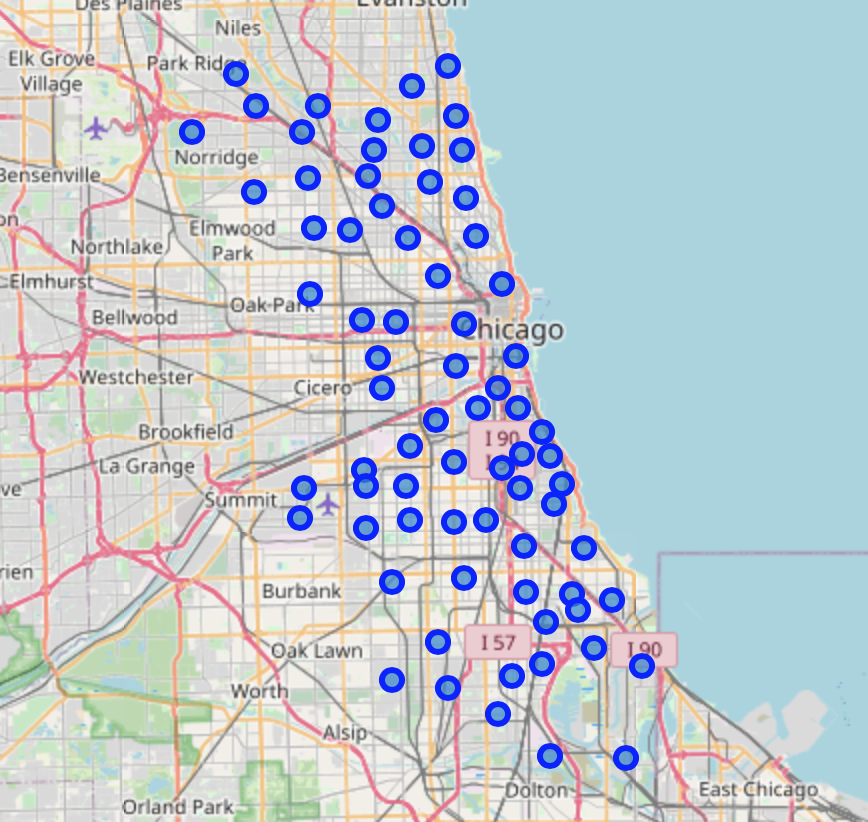

In [23]:
# Normalize Dataset
from sklearn.preprocessing import StandardScaler
ClusterPrep = neighborhoodfull.drop(columns = ['Neighborhood'])
X = ClusterPrep.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.89037739, -0.18232038, -1.13279926, ..., -0.03996074,
         0.07649539,  1.72516789],
       [-0.87703386,  0.03902916,  0.3781944 , ..., -0.18297541,
        -0.27563046,  1.62549435],
       [-0.86369033, -0.72718078, -1.86082348, ..., -0.40591225,
         0.22264609,  1.2890463 ],
       ...,
       [-0.04973498, -0.81231522,  0.62544791, ..., -0.81650772,
         0.09330445, -1.50867024],
       [-1.10387387, -0.80380178, -0.74818269, ..., -0.57454929,
        -2.52123104,  1.38770837],
       [-0.82365974, -0.9059631 , -1.64104258, ..., -0.32439629,
         0.15933632,  1.47282362]])

# Creating KMeans Clusters and Plotting on Map

Description: I chose to use KMeans Clusters in order to segment the neighborhoods of Chicago because the process will help me to spot any substantial differences between neighborhoods. This process works by creating centroid points that are determined by the data that most closely surrounds that point. Since I am using 5 different socioeconomic factors, along with longitude and latitude, the centroid points will help to bin the different neighborhoods. I have chosen to use 7 of these bins.

In [24]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 5, 5, 2, 2, 2, 4, 1, 5], dtype=int32)

In [25]:
neighborhoodfull.insert(0, 'Cluster Labels', kmeans.labels_)

In [26]:
neighborhoodfull.head()

Cluster Labels    Neighborhood  Household Poverty Rate  \
0               0     Rogers Park                    23.6   
1               0      West Ridge                    17.2   
2               5          Uptown                    24.0   
3               5  Lincoln Square                    10.9   
4               2    North Center                     7.5   

   Unofficial Unemployment Rate  Non-GED  Percent Children or Retirement Age  \
0                           8.7     18.2                                27.5   
1                           8.8     20.8                                38.5   
2                           8.9     11.8                                22.2   
3                           8.2     13.4                                25.5   
4                           5.2      4.5                                26.2   

   PER CAPITA INCOME   Hardship Index    White    Black  \
0               23939            39.0  39.3119  26.2970   
1               23040            46.0  42.6816  11.1409   
2               35787            20.0  51.6270  20.0046   
3               37524            17.0  63.0897   3.7678   
4               57123             6.0  77.3025   2.3159   

   American Indian and Alaska Native    Asian   Other  Two or More Races  \
0                             0.2582   6.4065  0.4383             2.8605   
1                             0.2627  22.4959  0.3169             2.6674   
2                             0.3389  11.3800  0.2484             2.1912   
3                             0.1823  11.1387  0.3520             2.3219   
4                             0.1726   4.5470  0.2102             1.8640   

   Hispanic or Latino  Longitude   Latitude  
0             24.4276 -87.668648  42.009120  
1             20.4345 -87.692394  41.999316  
2             14.2099 -87.658792  41.966222  
3             19.1477 -87.685397  41.968844  
4             13.5877 -87.681029  41.950503

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, pci, cluster in zip(neighborhoodfull['Latitude'], neighborhoodfull['Longitude'], neighborhoodfull['Neighborhood'],neighborhoodfull['PER CAPITA INCOME '], neighborhoodfull['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\n' + 'Per Capita Income: ' + str(pci), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

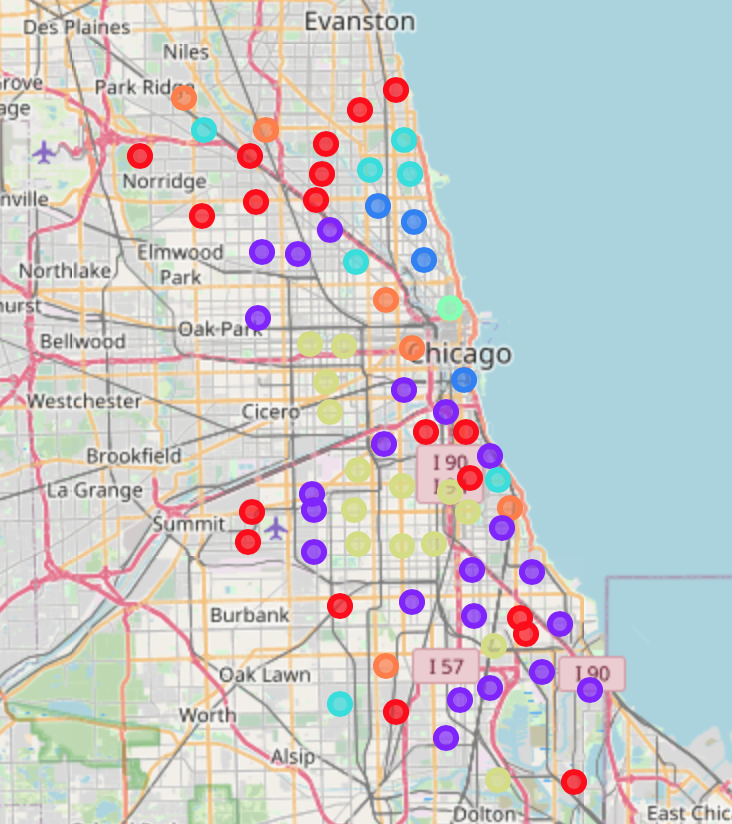

# For future reference:

Cluster 0 = Red


Cluster 1 = Purple

Cluster 2 = Blue

Cluster 3 = Light Blue

Cluster 4 = Pale Green

Cluster 5 = Olive Green

Cluster 6 = Orange

# Analysis Based on Socioeconomic/Demographic Information

<b>Analysis:</b> I can see from this map that for the most part there are clearly identifiable clusters of neighborhoods in Chicago. These are the following observations I made after briefly analyzing the map.

1: Cluster 3 is the most concentrated cluster. It is located almost entirely in the South-Western part of Chicago and, besides two neighborhoods, is located entirely south of the Eisenhower Expressway.

2: Cluster 0, Cluster 3, and Cluster 6 all represent the greatest number of neighborhoods. Cluster 3 and Cluster 6 are both mainly in the South/West Side of the city.

# Using FourSquare API for Clustering

Explanation: While looking at demographics and socioeconomic factors did help to segment the Chicago neighborhoods, I also want to understand if the venues present in each neighborhood differ from one another. Thus, I am going to merge this venue data with the dataframe that is in use and see if the clusters change substantially. This should help me to determine how disadvantaged communities are affected in relation to the venues that are most present within them. For a policy maker, or a non-profit organization, this could help determine what resources should be leveraged in these communities.

In [28]:
# Get Venue Data
neighborhood_latitude = neighborhoodfull.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoodfull.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoodfull.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rogers Park are 42.00912013, -87.66864797.


In [29]:
CLIENT_ID = 'YS3KUM2YFZUMDBFNDOC2AJJESTXEALV1UAG3ILLUTSZRT0IB' # your Foursquare ID
CLIENT_SECRET = '04USETT1L230YOI5T5BH2CUZ4OGG1RITWYV4DE3SVLJ54DIP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YS3KUM2YFZUMDBFNDOC2AJJESTXEALV1UAG3ILLUTSZRT0IB&client_secret=04USETT1L230YOI5T5BH2CUZ4OGG1RITWYV4DE3SVLJ54DIP&v=20180605&ll=42.00912013,-87.66864797&radius=1000&limit=100'

In [32]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
results = requests.get(url).json()


In [34]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name     categories        lat        lng
0  Morse Fresh Market  Grocery Store  42.008087 -87.667041
1      The Common Cup    Coffee Shop  42.007797 -87.667901
2  Rogers Park Social            Bar  42.007360 -87.666265
3    Lifeline Theatre        Theater  42.007372 -87.666284
4        The Glenwood            Bar  42.008502 -87.666273

In [35]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [36]:
chicagoneighborhood_venues = getNearbyVenues(names=neighborhoodfull['Neighborhood'],
                                   latitudes=neighborhoodfull['Latitude'],
                                   longitudes=neighborhoodfull['Longitude']
                                  )

Rogers Park
West Ridge
Uptown
Lincoln Square
North Center
Lake View
Lincoln Park
Near North Side
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Albany Park
Portage Park
Irving Park
Dunning
Montclare
Belmont Cragin
Hermosa
Avondale
Logan Square
Humboldt Park
West Town
Austin
West Garfield Park
East Garfield Park
Near West Side
North Lawndale
South Lawndale
Lower West Side
The Loop
Near South Side
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
Bridgeport
New City
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
West Englewood
Englewood
Greater Grand Crossing
Ashburn
Auburn Gresham
Beverly
Washington Heights
Mount Greenwood
Morgan Park
O'Hare
Edgewater


In [37]:
print('There are {} uniques categories.'.format(len(chicagoneighborhood_venues['Venue Category'].unique())))

There are 337 uniques categories.


# One Hot Encoding the Venues

Explanation: This will help to rank how many of these venues are present in each neighborhood

In [38]:
# one hot encoding
chicagoneighborhood_onehot = pd.get_dummies(chicagoneighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicagoneighborhood_onehot['Neighborhood'] = chicagoneighborhood_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicagoneighborhood_onehot.columns[-1]] + list(chicagoneighborhood_onehot.columns[:-1])
chicagoneighborhood_onehot = chicagoneighborhood_onehot[fixed_columns]

chicagoneighborhood_onehot.head()

Yoga Studio  ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0    0                  0               0                  0   
1            0    0                  0               0                  0   
2            0    0                  0               0                  0   
3            0    0                  0               0                  0   
4            0    0                  0               0                  0   

   African Restaurant  Airport  Airport Terminal  American Restaurant  \
0                   0        0                 0                    0   
1                   0        0                 0                    0   
2                   0        0                 0                    0   
3                   0        0                 0                    0   
4                   0        0                 0                    0   

   Amphitheater      ...        Video Store  Vietnamese Restaurant  \
0             0      ...                  0                      0   
1             0      ...                  0                      0   
2             0      ...                  0                      0   
3             0      ...                  0                      0   
4             0      ...                  0                      0   

   Warehouse Store  Weight Loss Center  Whisky Bar  Wine Bar  Wine Shop  \
0                0                   0           0         0          0   
1                0                   0           0         0          0   
2                0                   0           0         0          0   
3                0                   0           0         0          0   
4                0                   0           0         0          0   

   Winery  Wings Joint  Women's Store  
0       0            0              0  
1       0            0              0  
2       0            0              0  
3       0            0              0  
4       0            0              0  

[5 rows x 337 columns]

In [39]:
chicagoneighborhood_grouped = chicagoneighborhood_onehot.groupby('Neighborhood').mean().reset_index()
chicagoneighborhood_grouped.head()

Neighborhood  Yoga Studio  ATM  Accessories Store  Adult Boutique  \
0     Albany Park          0.0  0.0                0.0             0.0   
1  Archer Heights          0.0  0.0                0.0             0.0   
2   Armour Square          0.0  0.0                0.0             0.0   
3         Ashburn          0.0  0.0                0.0             0.0   
4  Auburn Gresham          0.0  0.0                0.0             0.0   

   Afghan Restaurant  African Restaurant  Airport  Airport Terminal  \
0                0.0                 0.0      0.0               0.0   
1                0.0                 0.0      0.0               0.0   
2                0.0                 0.0      0.0               0.0   
3                0.0                 0.0      0.0               0.0   
4                0.0                 0.0      0.0               0.0   

   American Restaurant      ...        Video Store  Vietnamese Restaurant  \
0             0.000000      ...           0.010526               0.010526   
1             0.017241      ...           0.034483               0.000000   
2             0.000000      ...           0.000000               0.000000   
3             0.142857      ...           0.000000               0.000000   
4             0.080000      ...           0.040000               0.000000   

   Warehouse Store  Weight Loss Center  Whisky Bar  Wine Bar  Wine Shop  \
0              0.0                 0.0         0.0       0.0        0.0   
1              0.0                 0.0         0.0       0.0        0.0   
2              0.0                 0.0         0.0       0.0        0.0   
3              0.0                 0.0         0.0       0.0        0.0   
4              0.0                 0.0         0.0       0.0        0.0   

   Winery  Wings Joint  Women's Store  
0     0.0     0.021053            0.0  
1     0.0     0.000000            0.0  
2     0.0     0.000000            0.0  
3     0.0     0.000000            0.0  
4     0.0     0.000000            0.0  

[5 rows x 337 columns]

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

I'm going to limit the number of venues listed to 5.

In [41]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicagoneighborhood_grouped['Neighborhood']

for ind in np.arange(chicagoneighborhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicagoneighborhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0     Albany Park    Mexican Restaurant    Chinese Restaurant   
1  Archer Heights    Mexican Restaurant                  Bank   
2   Armour Square    Chinese Restaurant           Pizza Place   
3         Ashburn         Hot Dog Joint  Fast Food Restaurant   
4  Auburn Gresham                  Park          Skating Rink   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Bakery        Sandwich Place         Grocery Store  
1                Bakery           Video Store                   Bar  
2          Dessert Shop     Korean Restaurant      Asian Restaurant  
3         Grocery Store                  Park        Clothing Store  
4              Pharmacy        Discount Store  Fast Food Restaurant

# Merging One Hot Encoded Dataframe with Demographic/Socioeconomic Dataframe

Explanation: I am making a separate dataframe here for use in Clustering. This way I can easily manipulate the original dataframe and merge the sorted venues dataframe with it after the KMeans clustering process.

In [42]:
neighborhoodfull2 = pd.merge(neighborhoodfull,chicagoneighborhood_grouped, on = 'Neighborhood')

In [43]:
neighborhoodfull2 = neighborhoodfull2.drop(columns = ['Cluster Labels'])

In [44]:
# Normalize Dataset
from sklearn.preprocessing import StandardScaler
ClusterPrep = neighborhoodfull2.drop(columns = ['Neighborhood'])
X = ClusterPrep.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.89037739, -0.18232038, -1.13279926, ..., -0.11470787,
        -0.40319778, -0.26299553],
       [-0.87703386,  0.03902916,  0.3781944 , ..., -0.11470787,
        -0.40319778,  0.57117563],
       [-0.86369033, -0.72718078, -1.86082348, ..., -0.11470787,
         0.57601016, -0.26299553],
       ...,
       [-0.04973498, -0.81231522,  0.62544791, ..., -0.11470787,
        -0.40319778, -0.26299553],
       [-1.10387387, -0.80380178, -0.74818269, ..., -0.11470787,
        -0.40319778, -0.26299553],
       [-0.82365974, -0.9059631 , -1.64104258, ..., -0.11470787,
        -0.40319778, -0.26299553]])

In [45]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 5, 5, 2, 2, 2, 4, 1, 5], dtype=int32)

# Merging Cluster Labels with Prior Dataframe and Dropping Current Cluster Labels

Explanation: In case any of the Cluster Labels changed in this process, I want to be sure that I drop the previous Cluster Labels, and add the new ones.

In [46]:
neighborhoodfull2.insert(0, 'Cluster Labels', kmeans.labels_)

In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, pci, cluster in zip(neighborhoodfull2['Latitude'], neighborhoodfull2['Longitude'], neighborhoodfull2['Neighborhood'],neighborhoodfull2['PER CAPITA INCOME '], neighborhoodfull2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\n' + 'Per Capita Income: ' + str(pci), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

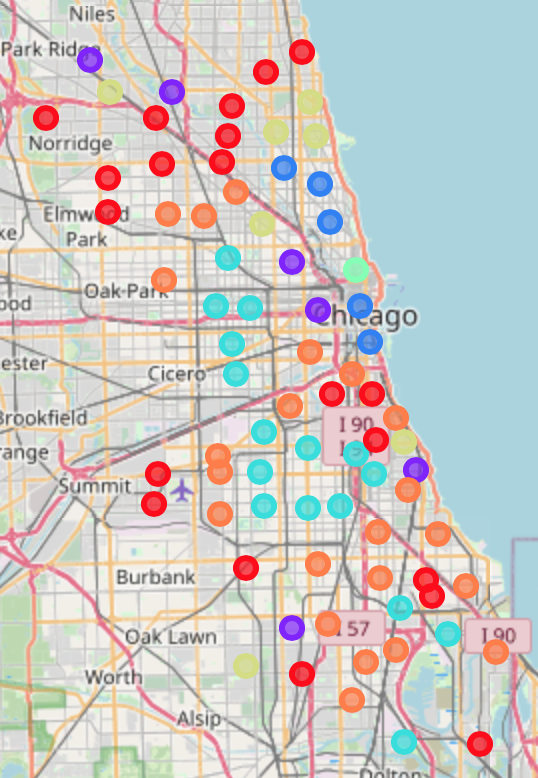

# For future reference:

Cluster 0 = Red

Cluster 1 = Purple

Cluster 2 = Blue

Cluster 3 = Light Blue

Cluster 4 = Pale Green

Cluster 5 = Olive Green

Cluster 6 = Orange

# Analysis with Venue Information Merged with Socioeconomic/Demographic Information

<b> Analysis:</b> There does not seem to be a dramatic difference in the clusters after running the KMeans clusters with the venue information. This seems promising and I will now dive into each of the clusters below.

<b> Summary: </b> I chose to use several classifications in order to create definitions for each clusters. The purpose of this is to clearly communicate my interpretation of the data that pertains to each cluster.

1. Wealth of Cluster (Determined by Per Capita Income)

    a. Lower Class: Per Capita Income < 25000 
     
    b. Middle Class: 25000 < Per Capita Income < 42000
     
    c. Upper Class: Per Capita Income > 42000
    

2. Demographic Makeup of Cluster (Determined by Demographic Data)
    
    a. Race Specific: Race > 50%
    
    b. Diverse: If no Race consists of > 50% of population
    

3. Need for Assistance (Determined by Hardship Index)
    
    a. None: Hardship Index < 5%
    
    b. Low: 5% < Hardship Index < 25%
    
    c. Moderate: 25% < Hardship Index < 40%
    
    d. High: 40% < Hardship Index < 60%
   
    e. Critical: Hardship Index > 60%
   

4. Geographic Constraint (Spatially Determined)

   a. Directional
   
   b. No Constraint

# Finding Centroid Points of Each Neighborhood

Explanation: I want to ensure that it is clear how each Cluster was segmented and what exactly the centroid points were in the process.

In [48]:
neighborhoodfull = neighborhoodfull2.iloc[0:73,0:17]

# Median Centroid Points

In [49]:
nf6 = neighborhoodfull.groupby('Cluster Labels').median()

In [50]:
nf6 = nf6.drop(columns = ['Longitude', 'Latitude'])

In [51]:
Cluster_Labels = [0,1,2,3,4,5,6]

In [52]:
nf6['Cluster Labels'] = Cluster_Labels

In [53]:
nf6

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
0                                14.25                         11.50    18.50   
1                                11.10                          7.40     6.15   
2                                12.30                          5.10     3.60   
3                                34.15                         20.40    27.55   
4                                12.90                          7.00     2.50   
5                                16.80                          8.90    11.80   
6                                23.70                         19.55    24.55   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
0                                            37.25             24137.5   
1                                            30.75             42078.5   
2                                            21.50             60058.0   
3                                            41.60             12343.0   
4                                            22.60             88669.0   
5                                            26.20             35787.0   
6                                            38.90             16930.5   

                Hardship Index     White     Black  \
Cluster Labels                                       
0                         38.5  40.49030   4.24090   
1                         11.5  58.01980  19.10920   
2                          5.0  77.30250   4.29380   
3                         88.5   2.51400  91.16735   
4                          1.0  72.10500  10.84940   
5                         21.0  51.62700   5.35780   
6                         65.0   6.98145  79.12415   

                American Indian and Alaska Native     Asian    Other  \
Cluster Labels                                                         
0                                         0.17180   4.20975  0.16175   
1                                         0.13150   7.26180  0.21415   
2                                         0.11660   5.99040  0.21020   
3                                         0.11380   0.17430  0.08205   
4                                         0.09820  10.11380  0.23360   
5                                         0.15250   5.45370  0.27060   
6                                         0.14535   0.58650  0.08670   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
0                         1.39455            25.70320               0  
1                         1.97945             8.49645               1  
2                         1.86400             6.86410               2  
3                         0.85040             5.27990               3  
4                         1.66240             4.93760               4  
5                         2.19120            14.20990               5  
6                         0.91635             8.32440               6

# Mean Centroid Points

In [54]:
nf5 = neighborhoodfull.groupby('Cluster Labels').mean()

In [55]:
nf5 = nf5.drop(columns = ['Longitude', 'Latitude'])

In [56]:
Cluster_Labels = [0,1,2,3,4,5,6]

In [57]:
nf5['Cluster Labels'] = Cluster_Labels

In [58]:
nf5

Household Poverty Rate  Unofficial Unemployment Rate  \
Cluster Labels                                                         
0                            15.783333                     13.088889   
1                            11.600000                      7.833333   
2                            11.940000                      5.120000   
3                            36.793750                     22.987500   
4                            12.900000                      7.000000   
5                            15.760000                     10.000000   
6                            24.181818                     18.668182   

                  Non-GED  Percent Children or Retirement Age  \
Cluster Labels                                                  
0               18.338889                           36.144444   
1                7.133333                           31.066667   
2                4.240000                           20.000000   
3               31.718750                           41.468750   
4                2.500000                           22.600000   
5               12.560000                           29.760000   
6               25.622727                           38.609091   

                PER CAPITA INCOME   Hardship Index      White      Black  \
Cluster Labels                                                             
0                     24635.166667       39.500000  35.875283  26.147594   
1                     41931.500000       11.666667  61.287650  17.479667   
2                     62667.000000        4.600000  70.262300  10.015360   
3                     12136.937500       87.562500   3.163719  66.055713   
4                     88669.000000        1.000000  72.105000  10.849400   
5                     34801.000000       21.400000  50.366800  20.287160   
6                     17381.772727       64.090909   8.674500  51.480591   

                American Indian and Alaska Native      Asian     Other  \
Cluster Labels                                                           
0                                        0.181278   8.166728  0.198017   
1                                        0.117467   7.417750  0.212483   
2                                        0.122940   9.409080  0.247680   
3                                        0.118456   0.568625  0.081575   
4                                        0.098200  10.113800  0.233600   
5                                        0.182980   7.012920  0.267000   
6                                        0.148455   4.678827  0.110055   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
0                        1.561233           27.869839               0  
1                        2.077917           11.407067               1  
2                        2.088940            7.853680               2  
3                        0.749169           29.262750               3  
4                        1.662400            4.937600               4  
5                        1.957300           19.925820               5  
6                        0.874509           34.033059               6

# Explanation for Decision to use Median vs. Mean Centroid Points

In the further analysis that I will conduct on this project I used the median of the cluster values versus the centroid points themselves. The reason for this is that, as it pertains to demographic information, there are neighborhoods that heavily skew towards one ethnicity or another. Since I am not using total population in this project, and thus am not truly accounting for the demographic makeup of an entire cluster, I do not want to falsely give the impression that a certain cluster is X% of Y Ethnicity. This should be taken into consideration when reviewing the following tables for each cluster, as the median values will most likely not add up to 100%.

In [59]:
neighborhoodfull = pd.merge(neighborhoodfull, neighborhoods_venues_sorted, on = 'Neighborhood')

# Cluster 0 Analysis

<b> Analysis: </b> Cluster 0 does not appear to be geographically constrained. There is a strong presence in both the North Side and the South Side. The median Per Capita Income does indicate that the cluster is just on the border of Middle and Lower Class.

<b> Additional Analysis: </b>

1. In terms of demographics, Cluster 0 presents an interesting case. Out of the 18 neighborhoods there are 3 (Calumet Heights, Avalon Park, and Grand Boulevard) with Black populations that make up more than 93% of those communities. 1 (Douglas) has a Black population that makes up ~73% of the community. After that, the percent of Black population falls off dramatically, with only 2 more neighborhoods (Rogers Park and Ashburn) where Blacks make up more than 12% of the area. That is why the median of the Black population is 4.24%. It should also be noted that out of all the neighborhoods listed, only Rogers Park is north of the Loop. For the most part, Whites are the majority in Cluster 0 with Hispanics/Latinos making up a significant portion of Cluster 0 neighborhoods.

<b> Cluster Definition: </b> 

I would define Cluster 0 as Lower/Middle Class, Diverse, in Moderate/High Need, and no Geographic Constraint


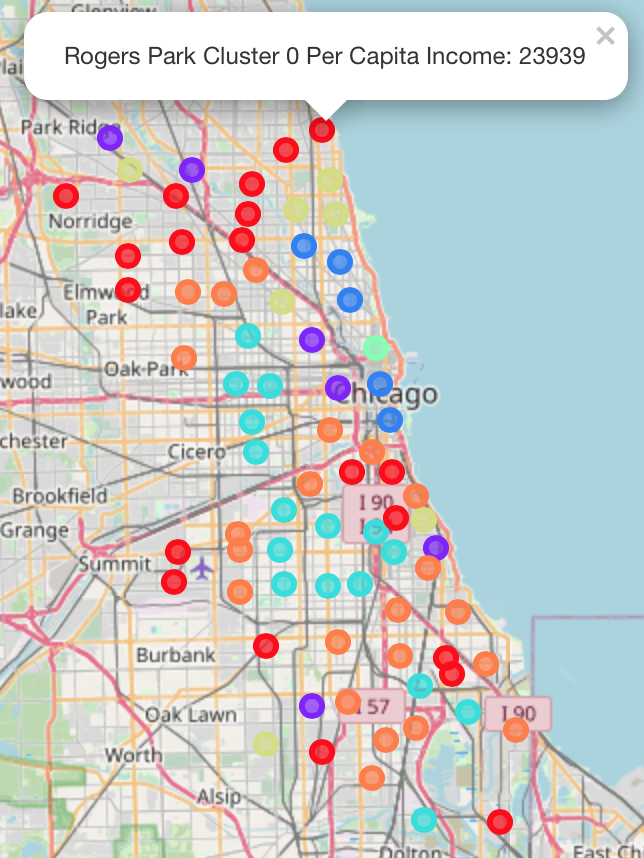

In [60]:
nf6.loc[nf6['Cluster Labels']==0,nf6.columns[list(range(0,nf6.shape[1]))]]

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
0                                14.25                          11.5     18.5   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
0                                            37.25             24137.5   

                Hardship Index    White   Black  \
Cluster Labels                                    
0                         38.5  40.4903  4.2409   

                American Indian and Alaska Native    Asian    Other  \
Cluster Labels                                                        
0                                          0.1718  4.20975  0.16175   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
0                         1.39455             25.7032               0

In [61]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 0, neighborhoodfull.columns[list(range(1, 17))]]

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
0       Rogers Park                    23.6                           8.7   
1        West Ridge                    17.2                           8.8   
10   Jefferson Park                     8.6                          12.4   
12       North Park                    13.2                           9.9   
13      Albany Park                    19.2                          10.0   
14     Portage Park                    11.6                          12.6   
15      Irving Park                    13.1                          10.0   
16          Dunning                    10.6                          10.0   
17        Montclare                    15.3                          13.8   
34          Douglas                    29.6                          18.2   
37  Grand Boulevard                    29.3                          24.3   
44      Avalon Park                    17.2                          21.1   
47  Calumet Heights                    11.5                          20.0   
54        Hegewisch                    17.1                           9.6   
55   Garfield Ridge                     8.8                          11.3   
59       Bridgeport                    18.9                          13.7   
63         Clearing                     8.9                           9.5   
69          Ashburn                    10.4                          11.7   

    Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
0      18.2                                27.5               23939   
1      20.8                                38.5               23040   
10     13.4                                35.5               27751   
12     14.4                                39.0               26576   
13     32.9                                32.0               21323   
14     19.3                                34.0               24336   
15     22.4                                31.6               27249   
16     16.2                                33.6               26282   
17     23.5                                38.6               22014   
34     14.3                                30.7               23791   
37     15.9                                39.5               23472   
44     10.6                                39.3               24454   
47     11.0                                44.0               28887   
54     19.2                                42.9               22677   
55     19.3                                38.1               26353   
59     22.2                                31.3               22694   
63     18.8                                37.6               25113   
69     17.7                                36.9               23482   

    Hardship Index    White    Black  American Indian and Alaska Native  \
0             39.0  39.3119  26.2970                             0.2582   
1             46.0  42.6816  11.1409                             0.2627   
10            25.0  68.6694   1.0413                             0.2790   
12            33.0  49.3391   3.1956                             0.2342   
13            53.0  29.2072   4.0278                             0.2309   
14            35.0  53.5353   1.3349                             0.1669   
15            34.0  41.6687   3.2534                             0.2324   
16            28.0  70.3806   0.7345                             0.0954   
17            50.0  37.5466   4.4540                             0.1564   
34            47.0   9.9243  72.6341                             0.2248   
37            57.0   1.7830  94.1447                             0.1505   
44            41.0   0.7953  95.7388                             0.1767   
47            38.0   0.9123  93.3753                             0.1231   
54            44.0  44.9289   3.8617                             0.2334   
55            32.0  53.2321   5.9108                             0.0

In [62]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 0, neighborhoodfull.columns[list([1,17,18,19,20,21])]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Rogers Park    Mexican Restaurant                 Beach   
1        West Ridge     Indian Restaurant         Grocery Store   
10   Jefferson Park     Convenience Store         Train Station   
12       North Park           Bus Station           Coffee Shop   
13      Albany Park    Mexican Restaurant    Chinese Restaurant   
14     Portage Park           Pizza Place    Italian Restaurant   
15      Irving Park           Bus Station        Sandwich Place   
16          Dunning  Fast Food Restaurant           Pizza Place   
17        Montclare  Fast Food Restaurant         Grocery Store   
34          Douglas        Sandwich Place  Fast Food Restaurant   
37  Grand Boulevard  Fast Food Restaurant           Art Gallery   
44      Avalon Park  Fast Food Restaurant        Sandwich Place   
47  Calumet Heights  Fast Food Restaurant        Cosmetics Shop   
54        Hegewisch    Chinese Restaurant                   Bar   
55   Garfield Ridge           Pizza Place  Gym / Fitness Center   
59       Bridgeport    Chinese Restaurant           Art Gallery   
63         Clearing           Video Store   American Restaurant   
69          Ashburn         Hot Dog Joint  Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  
0                    Bar                  Park             Sandwich Place  
1   Pakistani Restaurant  Fast Food Restaurant          Korean Restaurant  
10                   Bar            Restaurant                Coffee Shop  
12     Korean Restaurant                  Park                 Hookah Bar  
13                Bakery        Sandwich Place              Grocery Store  
14          Liquor Store         Grocery Store         Mexican Restaurant  
15    Italian Restaurant     Mobile Phone Shop  Latin American Restaurant  
16         Hot Dog Joint    Italian Restaurant             Ice Cream Shop  
17    Mexican Restaurant         Train Station                   Pharmacy  
34        Shipping Store           Wings Joint        Fried Chicken Joint  
37            Restaurant         Deli / Bodega                   Boutique  
44         Grocery Store           Pizza Place                       Park  
47              Pharmacy        Sandwich Place                Wings Joint  
54           Pizza Place          Intersection                     Lounge  
55   American Restaurant           Supermarket         Mexican Restaurant  
59    Mexican Restaurant           Pizza Place                       Park  
63           Pizza Place            Restaurant                      Diner  
69         Grocery Store                  Park             Clothing Store

# Cluster 1 Analysis

<b> Analysis: </b> On a high level it is clear to see that Cluster 1 is dispersed widely throughout the city. 

<b> Additional Observations </b> 

1. Cluster 1 leans towards being predominately White. The median for Percentage of Whites is ~58%.

2. Near West Side presents an interesting case. The Per Capita Income is the highest in Cluster 1. Yet, the Household Poverty Rate (20.6%) is nearly double that of the median of Cluster 1 (11.1%). In fact, the Household Poverty Rate is almost equal to that of the median of Cluster 6 (23.7%). The Unemployment Rate (10.7%) is also the highest in Cluster 1. 

<b> Cluster Definition </b>

Cluster 1 can be defined as being Upper Middle Class, White, in Low Need, and no Geographic Constraint.



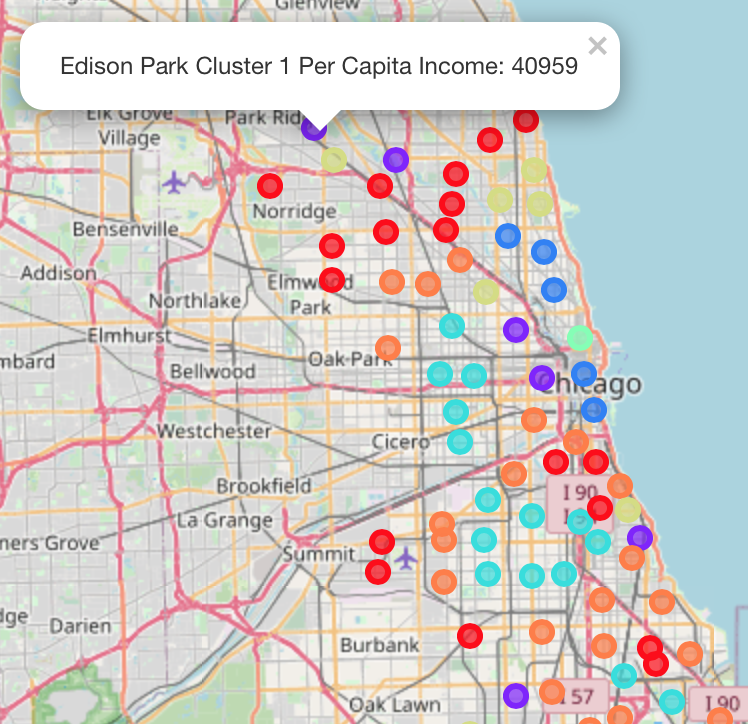

In [63]:
nf6.loc[nf6['Cluster Labels']==1,nf6.columns[list(range(0,nf6.shape[1]))]]

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
1                                 11.1                           7.4     6.15   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
1                                            30.75             42078.5   

                Hardship Index    White    Black  \
Cluster Labels                                     
1                         11.5  58.0198  19.1092   

                American Indian and Alaska Native   Asian    Other  \
Cluster Labels                                                       
1                                          0.1315  7.2618  0.21415   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
1                         1.97945             8.49645               1

In [64]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 1, neighborhoodfull.columns[list(range(1, 17))]]

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
8      Edison Park                     3.3                           6.5   
11     Forest Glen                     7.5                           6.8   
23       West Town                    14.7                           6.6   
27  Near West Side                    20.6                          10.7   
40       Hyde Park                    18.4                           8.4   
71         Beverly                     5.1                           8.0   

    Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
8       7.4                                35.3               40959   
11      4.9                                40.5               44164   
23     12.9                                21.7               43198   
27      9.6                                22.2               44689   
40      4.3                                26.2               39056   
71      3.7                                40.5               39523   

    Hardship Index    White    Black  American Indian and Alaska Native  \
8              8.0  88.3615   0.2592                             0.0268   
11            11.0  74.6434   0.7402                             0.1189   
23            10.0  57.2146   7.7873                             0.1471   
27            15.0  41.9854  31.5282                             0.1531   
40            14.0  46.6960  30.4311                             0.1441   
71            12.0  58.8250  34.1320                             0.1148   

      Asian   Other  Two or More Races  Hispanic or Latino  Longitude  \
8    2.4046  0.0805             1.0727              7.7948 -87.813459   
11  10.7467  0.0864             2.1774             11.4869 -87.757509   
23   3.7769  0.2286             1.7815             29.0639 -87.675436   
27  14.6171  0.3098             2.2084              9.1981 -87.657063   
40  12.4022  0.3699             3.6252              6.3315 -87.589644   
71   0.5590  0.1997             1.6023              4.5672 -87.675537   

     Latitude  
8   42.005335  
11  41.988860  
23  41.902424  
27  41.878050  
40  41.796310  
71  41.714674

In [65]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 1, neighborhoodfull.columns[list([1,17,18,19,20,21])]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
8      Edison Park                   Bar    Italian Restaurant   
11     Forest Glen                 Trail   American Restaurant   
23       West Town                  Café           Coffee Shop   
27  Near West Side           Coffee Shop           Pizza Place   
40       Hyde Park        Science Museum             Bookstore   
71         Beverly           Pizza Place        Cosmetics Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
8     Mexican Restaurant               Theater           Pizza Place  
11                  Park         Hot Dog Joint           Bus Station  
23           Pizza Place                Bakery    Salon / Barbershop  
27      Greek Restaurant    Italian Restaurant                  Park  
40                  Café         Grocery Store                  Park  
71        Sandwich Place      Department Store     Mobile Phone Shop

# Cluster 2 Analysis

<b> Analysis: </b> It is immediately apparent that Cluster 2 is substantially different than most of the other neighborhoods. The Per Capita Income is around 60000 and the Unemployment Rate is extremely low at around 5 percent. There is also significant geographic restraint in play, as neighborhoods that fall into Cluster 2 are close to the lake and are for the most part in the northern side of the city. Cluster 2 can be characterized as Upper Class.

<b> Additional Analysis </b>: 

1. The demographics of the neighborhoods of Cluster 2 swing heavily toward Whites, who make up 77 percent of the median. Blacks, Asians, Hispanics or Latinos, encompass relatively similar portions of the neighborhoods.

2. Cluster 2 has the highest rate of working age adults at almost 79 percent of the population. These are also educated individuals where over 95 percent have at least a GED. 

<b> Cluster Definition: </b>

I would define Cluster 2 as Upper Class, White, in no Need, and North Side

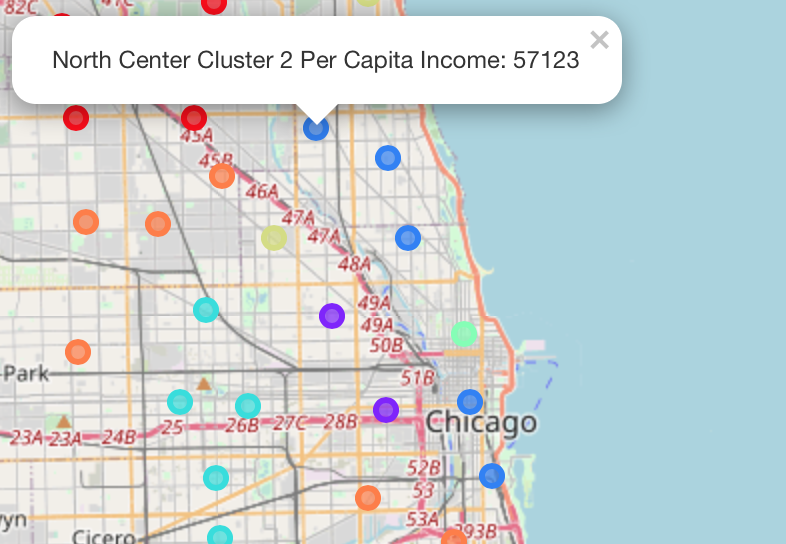

In [66]:
nf6.loc[nf6['Cluster Labels']==2,nf6.columns[list(range(0,nf6.shape[1]))]]

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
2                                 12.3                           5.1      3.6   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
2                                             21.5             60058.0   

                Hardship Index    White   Black  \
Cluster Labels                                    
2                          5.0  77.3025  4.2938   

                American Indian and Alaska Native   Asian   Other  \
Cluster Labels                                                      
2                                          0.1166  5.9904  0.2102   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
2                           1.864              6.8641               2

In [67]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 2, neighborhoodfull.columns[list(range(1, 17))]]

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
4      North Center                     7.5                           5.2   
5         Lake View                    11.4                           4.7   
6      Lincoln Park                    12.3                           5.1   
31         The Loop                    14.7                           5.7   
32  Near South Side                    13.8                           4.9   

    Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
4       4.5                                26.2               57123   
5       2.6                                17.0               60058   
6       3.6                                21.5               71551   
31      3.1                                13.5               65526   
32      7.4                                21.8               59077   

    Hardship Index    White    Black  American Indian and Alaska Native  \
4              6.0  77.3025   2.3159                             0.1726   
5              5.0  80.3715   3.8689                             0.1166   
6              2.0  82.8779   4.2938                             0.0842   
31             3.0  62.6951  11.4776                             0.1571   
32             7.0  48.0645  28.1206                             0.0842   

      Asian   Other  Two or More Races  Hispanic or Latino  Longitude  \
4    4.5470  0.2102             1.8640             13.5877 -87.681029   
5    5.9904  0.1950             1.8301              7.6276 -87.656409   
6    5.1407  0.2074             1.8264              5.5696 -87.649348   
31  15.9068  0.3313             2.5680              6.8641 -87.628150   
32  15.4605  0.2945             2.3562              5.6194 -87.621089   

     Latitude  
4   41.950503  
5   41.942514  
6   41.922431  
31  41.880251  
32  41.861337

In [68]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 2, neighborhoodfull.columns[list([1,17,18,19,20,21])]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
4      North Center                   Bar           Coffee Shop   
5         Lake View           Coffee Shop            Sports Bar   
6      Lincoln Park           Coffee Shop           Pizza Place   
31         The Loop           Coffee Shop               Theater   
32  Near South Side              Aquarium                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
4            Pizza Place                   Pub   American Restaurant  
5         Sandwich Place        Ice Cream Shop                   Bar  
6     Italian Restaurant                Bakery      Sushi Restaurant  
31                 Hotel                Museum           Salad Place  
32         Grocery Store         Historic Site        History Museum

# Cluster 3 Analysis

<b> Analysis: </b> Cluster 3 is at a consequential lack of resources. The median Per Capita Income is 4500 less than the next lowest median Per Capita Income of any cluster. The cluster is also extremely geographically constrained, being found largely in the South/Western parts of the city. For the purposes of this project, this cluster would be the primary focus of both government and non-government organizations to provide assistance.

<b> Additional Analysis: </b> 

1. The level of concentration as it relates to demographics is noticeable. Of the 16 neighborhoods in Cluster 3, there are only 4 (Humboldt Park, South Deering, New City, and Chicago Lawn) where multiple ethnicities consist of significant portions of the population, and even then those ethnicities are Blacks and Hispanics/Latinos. In 9 neighborhoods Blacks make up 90% or more of their respective communities. In the last 3 neighborhoods, Hispanics/Latinos make up 80% or more of the area. This points to fairly strong lines built on ethnic background.

2. Not only is the Unemployment Rate extremely high, the Percent of Working Age Adults is relatively low. This could indicate that families are both young and plagued by unemployment.

<b> Cluster Definition: </b>

I would define this cluster as Lower Class, Black, in Critical Need, and South/West Side





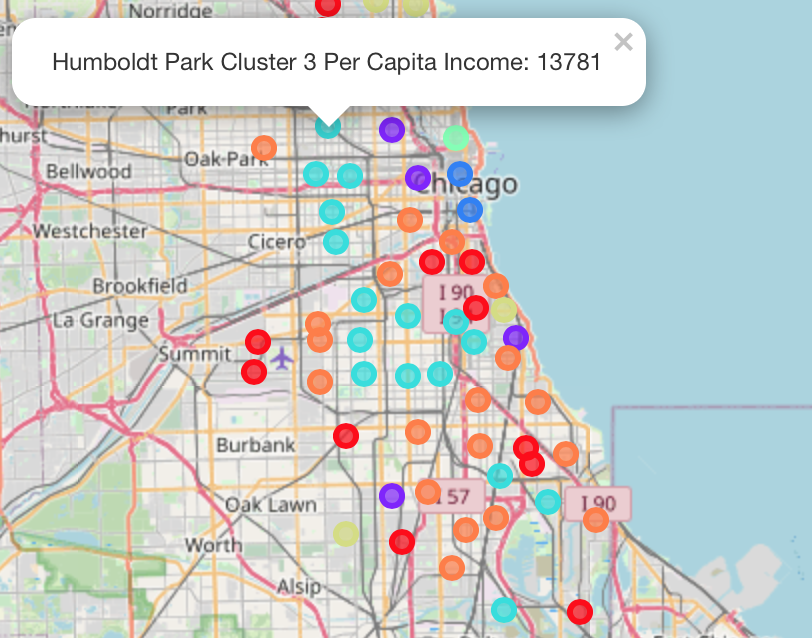

In [69]:
nf6.loc[nf6['Cluster Labels']==3,nf6.columns[list(range(0,nf6.shape[1]))]]

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
3                                34.15                          20.4    27.55   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
3                                             41.6             12343.0   

                Hardship Index  White     Black  \
Cluster Labels                                    
3                         88.5  2.514  91.16735   

                American Indian and Alaska Native   Asian    Other  \
Cluster Labels                                                       
3                                          0.1138  0.1743  0.08205   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
3                          0.8504              5.2799               3

In [70]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 3, neighborhoodfull.columns[list(range(1, 17))]]

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
22       Humboldt Park                    33.9                          17.3   
25  West Garfield Park                    41.7                          25.8   
26  East Garfield Park                    42.4                          19.6   
28      North Lawndale                    43.1                          21.2   
29      South Lawndale                    30.7                          15.8   
36         Fuller Park                    51.2                          33.9   
39     Washington Park                    42.1                          28.6   
46            Burnside                    33.0                          18.6   
50       South Deering                    29.2                          16.3   
53           Riverdale                    56.5                          34.6   
57       Brighton Park                    23.6                          13.9   
60            New City                    29.0                          23.0   
62           Gage Park                    23.4                          18.2   
65        Chicago Lawn                    27.9                          17.1   
66      West Englewood                    34.4                          35.9   
67           Englewood                    46.6                          28.0   

    Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
22     35.4                                38.0               13781   
25     24.5                                43.6               10934   
26     21.3                                43.2               12961   
28     27.6                                42.7               12034   
29     54.8                                33.8               10402   
36     26.6                                44.9               10432   
39     25.4                                42.8               13785   
46     19.3                                42.7               12515   
50     21.0                                39.5               14685   
53     27.5                                51.5                8201   
57     45.1                                39.3               13089   
60     41.5                                38.9               12765   
62     51.5                                38.8               12171   
65     31.2                                40.6               13231   
66     26.3                                40.7               11317   
67     28.5                                42.5               11888   

    Hardship Index    White    Black  American Indian and Alaska Native  \
22            85.0   4.4422  40.8892                             0.0994   
25            92.0   0.7388  96.1891                             0.1222   
26            83.0   3.3938  90.9029                             0.1167   
28            87.0   1.3700  91.4318                             0.2172   
29            96.0   3.8543  13.0839                             0.0795   
36            97.0   1.6342  92.1766                             0.0000   
39            88.0   0.7425  97.0385                             0.1109   
46            79.0   0.6516  97.7023                             0.0686   
50            65.0   4.7985  61.9101                             0.2052   
53            98.0   0.4937  96.4363                             0.1080   
57            84.0   8.1159   1.1947                             0.0882   
60            91.0  10.5843  29.6280                             0.1307   
62            93.0   4.7426   5.4169                             0.0577   
65            80.0   4.3485  49.2612                             0.1294   
66            89.0   0.3661  96.2625                             0.1887   
67            94.0   0.3425  97.3674                             0.1729   

     Asian   Other  Two or More Races  Hispanic or Latino  Longitude  \
22  0.3942  0.1562             0.6729             53.3459 -87.719205   
25  0.0444  0.0611   

In [71]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 3, neighborhoodfull.columns[list([1,17,18,19,20,21])]]

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
22       Humboldt Park    Mexican Restaurant  Latin American Restaurant   
25  West Garfield Park  Fast Food Restaurant              Train Station   
26  East Garfield Park   American Restaurant              Train Station   
28      North Lawndale  Fast Food Restaurant               Liquor Store   
29      South Lawndale    Mexican Restaurant                       Bank   
36         Fuller Park         Women's Store                       Park   
39     Washington Park  Fast Food Restaurant        Fried Chicken Joint   
46            Burnside                  Park              Train Station   
50       South Deering                  Park             Sandwich Place   
53           Riverdale                  Food                       Park   
57       Brighton Park           Pizza Place         Mexican Restaurant   
60            New City    Mexican Restaurant       Fast Food Restaurant   
62           Gage Park    Mexican Restaurant              Grocery Store   
65        Chicago Lawn    Mexican Restaurant             Discount Store   
66      West Englewood  Fast Food Restaurant               Liquor Store   
67           Englewood  Fast Food Restaurant               Liquor Store   

              3rd Most Common Venue 4th Most Common Venue  \
22                       Donut Shop         Grocery Store   
25                   Sandwich Place   Fried Chicken Joint   
26                             Food                Bakery   
28                             Food     Convenience Store   
29               Seafood Restaurant  Fast Food Restaurant   
36                Mobile Phone Shop                  Food   
39                    Women's Store         Train Station   
46  Southern / Soul Food Restaurant          Intersection   
50                    Bowling Alley        Breakfast Spot   
53                    Grocery Store                Garden   
57                             Bank        Ice Cream Shop   
60              American Restaurant         Grocery Store   
62                      Coffee Shop                Bakery   
65             Fast Food Restaurant        Cosmetics Shop   
66                   Sandwich Place        Cosmetics Shop   
67                             Food          Intersection   

          5th Most Common Venue  
22                  Video Store  
25               Clothing Store  
26                         Park  
28                Train Station  
29                     Pharmacy  
36         Fast Food Restaurant  
39               Sandwich Place  
46                 Liquor Store  
50            Other Repair Shop  
53  Eastern European Restaurant  
57               Sandwich Place  
60               Discount Store  
62                   Taco Place  
65                  Pizza Place  
66                   Shoe Store  
67                     Pharmacy

# Cluster 4 Analysis

<b> Analysis: </b> Cluster 4 consists of a singular neighborhood and that is Near North Side. It is heavily White and it is wealthy with a Per Capita Income of around 89000. It can be classified as Upper Class.

<b> Additional Analysis: </b> 

1. There seems to be a similar percent of working age adults that reside in Near North Side as Cluster 2.  

2. The 2nd Most Common venue in Near North Side are Hotels. This could imply that this is an area of the city well trafficked by tourists.

<b> Cluster Definition: </b>

I would define Cluster 4 as Upper Class, White, in no Need, and North Side

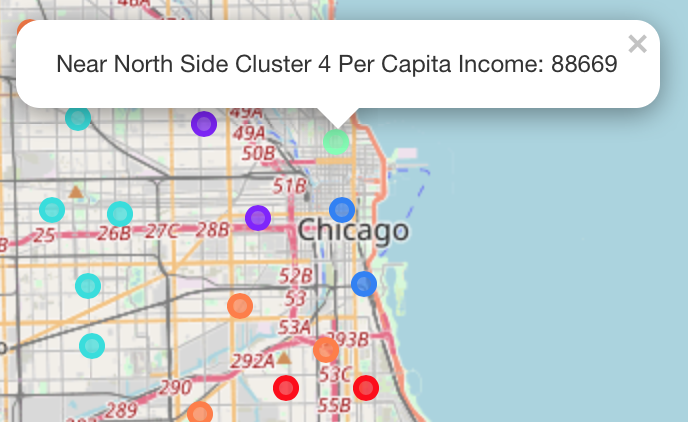

In [72]:
nf6.loc[nf6['Cluster Labels']==4,nf6.columns[list(range(0,nf6.shape[1]))]]

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
4                                 12.9                           7.0      2.5   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
4                                             22.6             88669.0   

                Hardship Index   White    Black  \
Cluster Labels                                    
4                          1.0  72.105  10.8494   

                American Indian and Alaska Native    Asian   Other  \
Cluster Labels                                                       
4                                          0.0982  10.1138  0.2336   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
4                          1.6624              4.9376               4

In [73]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 4, neighborhoodfull.columns[list(range(1, 17))]]

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
7  Near North Side                    12.9                           7.0   

   Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
7      2.5                                22.6               88669   

   Hardship Index   White    Black  American Indian and Alaska Native  \
7             1.0  72.105  10.8494                             0.0982   

     Asian   Other  Two or More Races  Hispanic or Latino  Longitude  \
7  10.1138  0.2336             1.6624              4.9376 -87.630686   

    Latitude  
7  41.897838

In [74]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 4, neighborhoodfull.columns[list([1,17,18,19,20,21])]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
7  Near North Side                 Hotel   American Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
7            Steakhouse    Italian Restaurant  Gym / Fitness Center

# Cluster 5 Analysis

<b> Analysis: </b> There does not appear to be any geographic constraint on Cluster 5 other than being more likely to be in the North Side. The Per Capita Income is Middle Class.

<b> Additional Analysis: </b>

1. Cluster 5 is very similar to Cluster 1 other than the rather large difference in the Median of Per Capita Income.

2. As was the case with Near West Side in relation to the rest of Cluster 1, there is a clear difference between Uptown and Kenwood and the rest of Cluster 5. Uptown has a Household Poverty rate of 24.0%, which is above the median Household Poverty Rate of Cluster 6 (23.7%), and Kenwood has a Household Poverty of 21.7%, which is slightly below. Kenwood also has an Unemployment Rate (15.7%) that is significantly higher than the median of Cluster 1 (8.9%). The Household Poverty Rate is somewhat in line with that of Hyde Park (18.4%), which is in Cluster 1.

<b> Cluster Definition: </b>

I would define this Cluster as being Middle Class, White (Slightly more diverse than Cluster 1, 2, and 4), in Low Need, and North Side

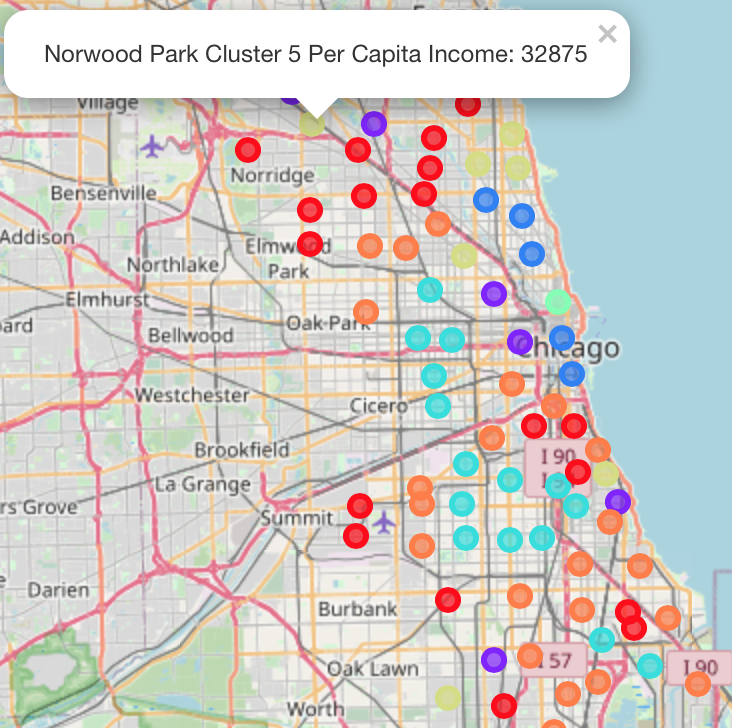

In [75]:
nf6.loc[nf6['Cluster Labels']==5,nf6.columns[list(range(0,nf6.shape[1]))]]

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
5                                 16.8                           8.9     11.8   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
5                                             26.2             35787.0   

                Hardship Index   White   Black  \
Cluster Labels                                   
5                         21.0  51.627  5.3578   

                American Indian and Alaska Native   Asian   Other  \
Cluster Labels                                                      
5                                          0.1525  5.4537  0.2706   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
5                          2.1912             14.2099               5

In [76]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 5, neighborhoodfull.columns[list(range(1, 17))]]

Neighborhood  Household Poverty Rate  Unofficial Unemployment Rate  \
2           Uptown                    24.0                           8.9   
3   Lincoln Square                    10.9                           8.2   
9     Norwood Park                     5.4                           9.0   
21    Logan Square                    16.8                           8.2   
38         Kenwood                    21.7                          15.7   

    Non-GED  Percent Children or Retirement Age  PER CAPITA INCOME   \
2      11.8                                22.2               35787   
3      13.4                                25.5               37524   
9      11.5                                39.5               32875   
21     14.8                                26.2               31908   
38     11.3                                35.4               35911   

    Hardship Index    White    Black  American Indian and Alaska Native  \
2             20.0  51.6270  20.0046                             0.3389   
3             17.0  63.0897   3.7678                             0.1823   
9             21.0  81.4548   0.4430                             0.1459   
21            23.0  39.1724   5.3578                             0.1525   
38            26.0  16.4901  71.8626                             0.0953   

      Asian   Other  Two or More Races  Hispanic or Latino  Longitude  \
2   11.3800  0.2484             2.1912             14.2099 -87.658792   
3   11.1387  0.3520             2.3219             19.1477 -87.685397   
9    4.5809  0.1053             1.2722             11.9979 -87.799565   
21   2.5113  0.2706             1.2996             51.2357 -87.695768   
38   5.4537  0.3587             2.7016              3.0379 -87.597685   

     Latitude  
2   41.966222  
3   41.968844  
9   41.989249  
21  41.922072  
38  41.809712

In [77]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 5, neighborhoodfull.columns[list([1,17,18,19,20,21])]]

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
2           Uptown  Vietnamese Restaurant           Coffee Shop   
3   Lincoln Square                    Bar       Thai Restaurant   
9     Norwood Park                   Park   American Restaurant   
21    Logan Square     Mexican Restaurant           Coffee Shop   
38         Kenwood                   Park         Grocery Store   

   3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  
2                    Bar       Mexican Restaurant    Chinese Restaurant  
3            Coffee Shop       Italian Restaurant                   Gym  
9                    Spa       Italian Restaurant           Coffee Shop  
21          Cocktail Bar                      Bar               Brewery  
38           Bus Station  Health & Beauty Service        Discount Store

# Cluster 6 Analysis

<b> Analysis:</b> There are similarities between Cluster 3 and Cluster 6. Both clusters have Per Capita Income that is within 4500 of each other. Additionally, both clusters are more likely to be present in the South Side versus being found in the North Side.

<b> Additional Observations: </b> 

1. Cluster 6 is predominately Black, with Hispanics or Latinos making up the other significant ethnicity in the cluster. Again there is a similarity to Cluster 3 in terms of the extremes at which specific demographics make up neighborhoods. Of the 22 neighborhoods in Cluster 6, there are 12 that have Black populations that comprise more than 75% of the neighborhood. Of these 12 predominately Black neighborhoods, 8 of them consist of 93% or higher Black populations. On a related note, there are 9 neighborhoods with Hispanic/Latino populations of 64% or higher.

2. Similarily to Cluster 3 and Cluster 0, the Percent of Children or Retired Adults is fairly high as compared to other clusters.

<b> Cluster Definition </b>:

I would define Cluster 6 as being Lower Class, Black or Hispanic/Latino, in Critical Need, South Side

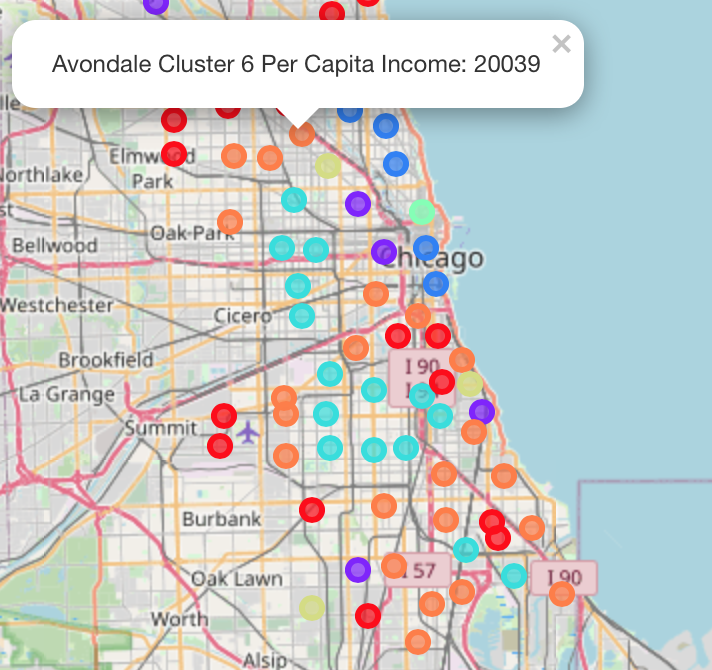

In [78]:
nf6.loc[nf6['Cluster Labels']==6,nf6.columns[list(range(0,nf6.shape[1]))]]

Household Poverty Rate  Unofficial Unemployment Rate  Non-GED  \
Cluster Labels                                                                  
6                                 23.7                         19.55    24.55   

                Percent Children or Retirement Age  PER CAPITA INCOME   \
Cluster Labels                                                           
6                                             38.9             16930.5   

                Hardship Index    White     Black  \
Cluster Labels                                      
6                         65.0  6.98145  79.12415   

                American Indian and Alaska Native   Asian   Other  \
Cluster Labels                                                      
6                                         0.14535  0.5865  0.0867   

                Two or More Races  Hispanic or Latino  Cluster Labels  
Cluster Labels                                                         
6                         0.91635              8.3244               6

In [79]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 6, neighborhoodfull.columns[list(range(1, 17))]]

Neighborhood  Household Poverty Rate  \
18          Belmont Cragin                    18.7   
19                 Hermosa                    20.5   
20                Avondale                    15.3   
24                  Austin                    28.6   
30         Lower West Side                    25.8   
33           Armour Square                    40.1   
35                 Oakland                    39.7   
41                Woodlawn                    30.7   
42             South Shore                    31.1   
43                 Chatham                    27.8   
45           South Chicago                    29.8   
48                Roseland                    19.8   
49                 Pullman                    21.6   
51               East Side                    19.2   
52            West Pullman                    25.9   
56          Archer Heights                    14.1   
58           McKinley Park                    18.7   
61             West Elsdon                    15.6   
64               West Lawn                    14.9   
68  Greater Grand Crossing                    29.6   
70          Auburn Gresham                    27.6   
72      Washington Heights                    16.9   

    Unofficial Unemployment Rate  Non-GED  Percent Children or Retirement Age  \
18                          14.6     37.3                                37.3   
19                          13.1     41.6                                36.4   
20                           9.2     24.7                                31.0   
24                          22.6     24.4                                37.9   
30                          15.8     40.7                                32.6   
33                          16.7     34.5                                38.3   
35                          28.7     18.4                                40.4   
41                          23.4     16.5                                36.1   
42                          20.0     14.0                                35.7   
43                          24.0     14.5                                40.3   
45                          19.7     26.6                                41.1   
48                          20.3     16.9                                41.2   
49                          22.8     13.1                                38.6   
51                          12.1     31.9                                42.8   
52                          19.4     20.5                                42.1   
56                          16.5     35.9                                39.2   
58                          13.4     32.9                                35.6   
61                          16.7     37.0                                37.7   
64                           9.6     33.6                                39.6   
68                          23.0     16.5                                41.0   
70                          28.3     18.5                                41.9   
72                          20.8     13.7                                42.6   

    PER CAPITA INCOME   Hardship Index    White    Black  \
18               15461            70.0  15.1874   3.1660   
19               15089            71.0   7.6489   3.0268   
20               20039            42.0  28.4397   2.5241   
24               15957            73.0   4.4298  85.1016   
30               16444            76.0  12.4326   3.0977   
33               16148            82.0  12.2620  10.5967   
35               19252            78.0   2.0615  94.0689   
41               18672            58.0   6.8366  86.7944   
42               19398            55.0   1.3920  94.8625   
43               18881            60.0   0.3610  97.2025   
45               16579            75.0   1.9200  74.6715   
48               17949            52.0   0.4213  97.3733   
49               20588            51.0   7.1263  83.5768   
51               17104            64.0  17.2251   3.3721   
52     

In [80]:
neighborhoodfull.loc[neighborhoodfull['Cluster Labels'] == 6, neighborhoodfull.columns[list([1,17,18,19,20,21])]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
18          Belmont Cragin    Mexican Restaurant         Grocery Store   
19                 Hermosa    Mexican Restaurant        Discount Store   
20                Avondale                   Bar    Mexican Restaurant   
24                  Austin         Grocery Store        Discount Store   
30         Lower West Side    Mexican Restaurant           Pizza Place   
33           Armour Square    Chinese Restaurant           Pizza Place   
35                 Oakland                  Park                 Beach   
41                Woodlawn           Coffee Shop        Sandwich Place   
42             South Shore    Chinese Restaurant    Seafood Restaurant   
43                 Chatham    Chinese Restaurant        Sandwich Place   
45           South Chicago    Mexican Restaurant              Pharmacy   
48                Roseland        Sandwich Place          Intersection   
49                 Pullman   Fried Chicken Joint         Train Station   
51               East Side    Mexican Restaurant                   Bar   
52            West Pullman         Train Station         Grocery Store   
56          Archer Heights    Mexican Restaurant                  Bank   
58           McKinley Park           Video Store           Gas Station   
61             West Elsdon    Mexican Restaurant           Pizza Place   
64               West Lawn    Mexican Restaurant        Ice Cream Shop   
68  Greater Grand Crossing   American Restaurant  Fast Food Restaurant   
70          Auburn Gresham                  Park          Skating Rink   
72      Washington Heights   Fried Chicken Joint        Cosmetics Shop   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  
18            Donut Shop              Pharmacy              Restaurant  
19         Grocery Store           Pizza Place          Sandwich Place  
20            Donut Shop         Grocery Store          Ice Cream Shop  
24            Donut Shop           Bus Station          Sandwich Place  
30                   Bar                Bakery  Thrift / Vintage Store  
33          Dessert Shop     Korean Restaurant        Asian Restaurant  
35             BBQ Joint        Discount Store                  Bakery  
41             Bookstore                  Café                    Park  
42                  Bank        Sandwich Place                     Gym  
43  Fast Food Restaurant              Boutique                    Park  
45        Discount Store         Grocery Store                    Park  
48        Baseball Field                  Park            Home Service  
49            Donut Shop        Sandwich Place          Clothing Store  
51                  Park        Shipping Store              Taco Place  
52                  Food        Cosmetics Shop                    Park  
56                Bakery           Video Store                     Bar  
58    Mexican Restaurant          Soccer Field              Donut Shop  
61         Grocery Store           Gas Station                  Bakery  
64           Pizza Place    Chinese Restaurant    Fast Food Restaurant  
68          Liquor Store                Lounge                     Bar  
70              Pharmacy        Discount Store    Fast Food Restaurant  
72        Sandwich Place            Donut Shop           Train Station

# Conclusion


I believe that it is clear to see from analysis of these different clusters that Chicago is indeed highly segregated, which can particularly be seen in the difference between the North Side and South Side of Chicago. Specific parts of the North Side are White, Upper Class, and not in any Need. This does not necessarily remain true for the South Side. 

It should also be stated that the neighborhoods of mainly Black and Hispanic or Latino communities are plainly less well to do economically than their counterparts. This is apparent by analyzing the rates of unemployment, Non-GEDs, household poverty, etc. The dramatically lower Per Capita Income is also quite telling. To further that point, the highest Per Capita Income of a neighborhood with a Black majority, Kenwood, is 35911. The highest Per Capita Income of a Hispanic/Latino majority neighborhood, Logan Square, is only 31908. These incomes are solidly in the Middle Class. 

It is also worth mentioning that there is a noticeable presence of homogenous populations in neighborhoods in Critical need. Often times, these neighborhoods will be 85-90% or above of a single ethnicity, and by and large, this ethnicity will be either Blacks or Hispanics/Latinos. 

I also believe that the venues that are present in neighborhoods can help to further segment them. It is clear that by looking at Cluster 3 and Cluster 6, which are the two clusters that are in the most need, that the venues that are the most common tend to differ dramatically from Cluster 1, Cluster 2, and Cluster 4. However, I doubt that the answer to the woes of Cluster 3 and Cluster 6 would simply be for there to be more Coffee Shops and Cafes. Yet, it is important to understand the lived experiences of the individuals that reside in these clusters as it relates to the venues that they have access to. 

In conclusion, it is important that government and non-government organizations have access to analysis such as this. I know that it will be helpful in determining the ways that solutions can be reached in assisting neighborhoods in need. These solutions will have to be nuanced, with the understanding that what may work for one neighborhood is not what will work for another. That is why this segmenting project is important, as it may provide a foundation to understanding the situation at hand in Chicago.